<a href="https://colab.research.google.com/github/Wanghley/smart-grid-forecast/blob/main/notebooks/data%20preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Pecan gathering

In [1]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%pip install "dask[complete]" -q  # Install everything
%pip install openmeteo-requests
%pip install requests-cache retry-requests

In [3]:
import pandas as pd

In [4]:
import dask.dataframe as dd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import requests

In [6]:
root_path = "/content/drive/MyDrive/Workspace/PROGRAMS/2025 AI4All/project/data"

## Dataset Loading

In [7]:
path = root_path+"/pecan dataset" # need to change to your location when executing

### 1-min resolution

In [8]:
path_1min = path + "/1-min resolution"

In [9]:
import tarfile

def unpack_tar_gz(file_path, destination_folder):
    """Unpacks a .tar.gz file to a specified destination folder.

    Args:
        file_path (str): The path to the .tar.gz file.
        destination_folder (str): The path to the destination folder where the content will be extracted.
    """
    try:
        with tarfile.open(file_path, "r:gz") as tar:
            tar.extractall(destination_folder)
        print(f"Successfully extracted '{file_path}' to '{destination_folder}'")
    except FileNotFoundError:
        print(f"Error: File not found at '{file_path}'")
    except Exception as e:
        print(f"An error occurred: {e}")

In [10]:
destination_folder = '/content/'

In [11]:
unpack_tar_gz(path_1min + "/1minute_data_california.tar.gz", destination_folder)

Successfully extracted '/content/drive/MyDrive/Workspace/PROGRAMS/2025 AI4All/project/data/pecan dataset/1-min resolution/1minute_data_california.tar.gz' to '/content/'


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
unpack_tar_gz(path_1min + "/1minute_data_newyork.tar.gz", destination_folder)

Successfully extracted '/content/drive/MyDrive/Workspace/PROGRAMS/2025 AI4All/project/data/pecan dataset/1-min resolution/1minute_data_newyork.tar.gz' to '/content/'


In [14]:
unpack_tar_gz(path_1min + "/pr_1min.tar.gz", destination_folder)

Successfully extracted '/content/drive/MyDrive/Workspace/PROGRAMS/2025 AI4All/project/data/pecan dataset/1-min resolution/pr_1min.tar.gz' to '/content/'


### 15-min resolution

In [15]:
destination_folder = '/content/15-min'

In [16]:
path_15min = path + "/15-min resolution"

In [17]:
unpack_tar_gz(path_15min + "/15minute_data_austin.tar.gz", destination_folder)

Successfully extracted '/content/drive/MyDrive/Workspace/PROGRAMS/2025 AI4All/project/data/pecan dataset/15-min resolution/15minute_data_austin.tar.gz' to '/content/15-min'


In [18]:
unpack_tar_gz(path_15min + "/15minute_data_california.tar.gz", destination_folder)

Successfully extracted '/content/drive/MyDrive/Workspace/PROGRAMS/2025 AI4All/project/data/pecan dataset/15-min resolution/15minute_data_california.tar.gz' to '/content/15-min'


In [19]:
unpack_tar_gz(path_15min + "/pr_15min.tar.gz", destination_folder)

Successfully extracted '/content/drive/MyDrive/Workspace/PROGRAMS/2025 AI4All/project/data/pecan dataset/15-min resolution/pr_15min.tar.gz' to '/content/15-min'


In [20]:
unpack_tar_gz(path_15min + "/15minute_data_newyork.tar.gz", destination_folder)

Successfully extracted '/content/drive/MyDrive/Workspace/PROGRAMS/2025 AI4All/project/data/pecan dataset/15-min resolution/15minute_data_newyork.tar.gz' to '/content/15-min'


## Dataset loading

In [21]:
path_15min = path + "/15-min resolution"
df15cal = pd.read_csv("/content/15-min/15minute_data_california/15minute_data_california.csv")


In [22]:
df15cal.head()

,dataid,local_15min,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v
0,3687,2014-01-01 00:00:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.239,119.769
1,3687,2014-01-01 00:15:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.256,119.628
2,3687,2014-01-01 00:30:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.358,119.859
3,3687,2014-01-01 00:45:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.766,119.985
4,3687,2014-01-01 01:00:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.844,120.368


In [23]:
df15tx = pd.read_csv("/content/15-min/15minute_data_california/15minute_data_california.csv")
df15tx.head()

,dataid,local_15min,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v
0,3687,2014-01-01 00:00:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.239,119.769
1,3687,2014-01-01 00:15:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.256,119.628
2,3687,2014-01-01 00:30:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.358,119.859
3,3687,2014-01-01 00:45:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.766,119.985
4,3687,2014-01-01 01:00:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.844,120.368


In [24]:
df15ny = pd.read_csv("/content/15-min/15minute_data_newyork/15minute_data_newyork.csv")
df15ny.head()

,dataid,local_15min,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v
0,4550,2019-06-24 14:45:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,120.625,120.750
1,4550,2019-06-24 14:30:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,120.456,120.558
2,4550,2019-06-24 14:15:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,120.513,120.629
3,4550,2019-06-24 14:00:00-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,121.567,121.638
4,558,2019-06-24 14:45:00-05,0.081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.390,120.388


In [25]:
# prompt: combine my data together merging them and creating a new column called location (california or austin-texas or new york)

# Add 'location' column to each DataFrame
df15cal['location'] = 'california'
df15tx['location'] = 'texas' # Assuming df15tx was intended to be Austin data
df15ny['location'] = 'new york'

# Combine the dataframes
combined_df = pd.concat([df15cal, df15tx, df15ny], ignore_index=True)

# Display the first few rows of the combined DataFrame
combined_df.describe()

,dataid,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,...,sprinkler1,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v
count,2.052647e+06,1.801283e+06,35327.000000,0.0,17664.000000,0.0,70656.000000,0.0,70656.000000,0.0,...,0.0,17664.000000,35328.000000,35328.000000,176639.000000,0.0,158975.000000,0.0,2.052647e+06,2.052647e+06
mean,5.224519e+03,9.337036e-02,0.032976,NaN,0.000488,NaN,0.004370,NaN,0.029447,NaN,...,NaN,0.003936,0.202180,0.008533,0.200858,NaN,0.019322,NaN,1.206849e+02,1.208509e+02
std,3.023600e+03,3.686086e-01,0.185626,NaN,0.003345,NaN,0.014576,NaN,0.113602,NaN,...,NaN,0.017721,0.135203,0.037347,0.628078,NaN,0.072704,NaN,1.870178e+00,1.807272e+00
min,2.700000e+01,-6.000000e-03,-0.003000,NaN,-0.002000,NaN,-0.001000,NaN,-0.003000,NaN,...,NaN,-0.002000,-0.002000,0.000000,-0.024000,NaN,-0.014000,NaN,0.000000e+00,0.000000e+00
25%,2.606000e+03,0.000000e+00,0.000000,NaN,0.000000,NaN,0.001000,NaN,0.003000,NaN,...,NaN,0.000000,0.091000,0.001000,0.000000,NaN,0.000000,NaN,1.199930e+02,1.202250e+02
50%,4.934000e+03,0.000000e+00,0.006000,NaN,0.000000,NaN,0.001000,NaN,0.005000,NaN,...,NaN,0.000000,0.149000,0.003000,0.001000,NaN,0.000000,NaN,1.205300e+02,1.207390e+02
75%,8.061000e+03,0.000000e+00,0.028000,NaN,0.001000,NaN,0.001000,NaN,0.014000,NaN,...,NaN,0.000000,0.287000,0.005000,0.003000,NaN,0.002000,NaN,1.211790e+02,1.213440e+02
max,9.836000e+03,3.767000e+00,4.036000,NaN,0.092000,NaN,0.179000,NaN,1.437000,NaN,...,NaN,0.496000,0.921000,0.621000,13.099000,NaN,1.176000,NaN,1.694490e+02,1.697450e+02


In [26]:
combined_df['dataid'].nunique()

48

We have 48 different households!

## Exploratory Data preprocessing

In [27]:
combined_df.columns

Index(['dataid', 'local_15min', 'air1', 'air2', 'air3', 'airwindowunit1',
       'aquarium1', 'bathroom1', 'bathroom2', 'bedroom1', 'bedroom2',
       'bedroom3', 'bedroom4', 'bedroom5', 'battery1', 'car1', 'car2',
       'circpump1', 'clotheswasher1', 'clotheswasher_dryg1', 'diningroom1',
       'diningroom2', 'dishwasher1', 'disposal1', 'drye1', 'dryg1', 'freezer1',
       'furnace1', 'furnace2', 'garage1', 'garage2', 'grid', 'heater1',
       'heater2', 'heater3', 'housefan1', 'icemaker1', 'jacuzzi1', 'kitchen1',
       'kitchen2', 'kitchenapp1', 'kitchenapp2', 'lights_plugs1',
       'lights_plugs2', 'lights_plugs3', 'lights_plugs4', 'lights_plugs5',
       'lights_plugs6', 'livingroom1', 'livingroom2', 'microwave1', 'office1',
       'outsidelights_plugs1', 'outsidelights_plugs2', 'oven1', 'oven2',
       'pool1', 'pool2', 'poollight1', 'poolpump1', 'pump1', 'range1',
       'refrigerator1', 'refrigerator2', 'security1', 'sewerpump1', 'shed1',
       'solar', 'solar2', 'sprinkler1

In [28]:
combined_df['local_15min'][:100].unique()

array(['2014-01-01 00:00:00-06', '2014-01-01 00:15:00-06',
       '2014-01-01 00:30:00-06', '2014-01-01 00:45:00-06',
       '2014-01-01 01:00:00-06', '2014-01-01 01:15:00-06',
       '2014-01-01 01:30:00-06', '2014-01-01 01:45:00-06',
       '2014-01-01 02:00:00-06', '2014-01-01 02:15:00-06',
       '2014-01-01 02:30:00-06', '2014-01-01 02:45:00-06',
       '2014-01-01 03:00:00-06', '2014-01-01 03:15:00-06',
       '2014-01-01 03:30:00-06', '2014-01-01 03:45:00-06',
       '2014-01-01 04:00:00-06', '2014-01-01 04:15:00-06',
       '2014-01-01 04:30:00-06', '2014-01-01 04:45:00-06',
       '2014-01-01 05:00:00-06', '2014-01-01 05:15:00-06',
       '2014-01-01 05:30:00-06', '2014-01-01 05:45:00-06',
       '2014-01-01 06:00:00-06', '2014-01-01 06:15:00-06',
       '2014-01-01 06:30:00-06', '2014-01-01 06:45:00-06',
       '2014-01-01 07:00:00-06', '2014-01-01 07:15:00-06',
       '2014-01-01 07:30:00-06', '2014-01-01 07:45:00-06',
       '2014-01-01 08:00:00-06', '2014-01-01 08:15:00-06

Converting time to a datatime format to facilitate processing

In [29]:
combined_df['time'] = combined_df['local_15min'].apply(lambda x:datetime.strptime(x[:13],"%Y-%m-%d %H"))

In [30]:
combined_df.head(5)

,dataid,local_15min,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v,location,time
0,3687,2014-01-01 00:00:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,120.239,119.769,california,2014-01-01 00:00:00
1,3687,2014-01-01 00:15:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,120.256,119.628,california,2014-01-01 00:00:00
2,3687,2014-01-01 00:30:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,120.358,119.859,california,2014-01-01 00:00:00
3,3687,2014-01-01 00:45:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,120.766,119.985,california,2014-01-01 00:00:00
4,3687,2014-01-01 01:00:00-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,120.844,120.368,california,2014-01-01 01:00:00


In [31]:
combined_df.describe()

,dataid,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,...,sumppump1,utilityroom1,venthood1,waterheater1,waterheater2,wellpump1,winecooler1,leg1v,leg2v,time
count,2.052647e+06,1.801283e+06,35327.000000,0.0,17664.000000,0.0,70656.000000,0.0,70656.000000,0.0,...,17664.000000,35328.000000,35328.000000,176639.000000,0.0,158975.000000,0.0,2.052647e+06,2.052647e+06,2052647
mean,5.224519e+03,9.337036e-02,0.032976,NaN,0.000488,NaN,0.004370,NaN,0.029447,NaN,...,0.003936,0.202180,0.008533,0.200858,NaN,0.019322,NaN,1.206849e+02,1.208509e+02,2016-08-02 03:37:28.303385088
min,2.700000e+01,-6.000000e-03,-0.003000,NaN,-0.002000,NaN,-0.001000,NaN,-0.003000,NaN,...,-0.002000,-0.002000,0.000000,-0.024000,NaN,-0.014000,NaN,0.000000e+00,0.000000e+00,2014-01-01 00:00:00
25%,2.606000e+03,0.000000e+00,0.000000,NaN,0.000000,NaN,0.001000,NaN,0.003000,NaN,...,0.000000,0.091000,0.001000,0.000000,NaN,0.000000,NaN,1.199930e+02,1.202250e+02,2014-12-28 08:00:00
50%,4.934000e+03,0.000000e+00,0.006000,NaN,0.000000,NaN,0.001000,NaN,0.005000,NaN,...,0.000000,0.149000,0.003000,0.001000,NaN,0.000000,NaN,1.205300e+02,1.207390e+02,2015-11-18 07:00:00
75%,8.061000e+03,0.000000e+00,0.028000,NaN,0.001000,NaN,0.001000,NaN,0.014000,NaN,...,0.000000,0.287000,0.005000,0.003000,NaN,0.002000,NaN,1.211790e+02,1.213440e+02,2018-08-29 14:00:00
max,9.836000e+03,3.767000e+00,4.036000,NaN,0.092000,NaN,0.179000,NaN,1.437000,NaN,...,0.496000,0.921000,0.621000,13.099000,NaN,1.176000,NaN,1.694490e+02,1.697450e+02,2019-10-31 23:00:00
std,3.023600e+03,3.686086e-01,0.185626,NaN,0.003345,NaN,0.014576,NaN,0.113602,NaN,...,0.017721,0.135203,0.037347,0.628078,NaN,0.072704,NaN,1.870178e+00,1.807272e+00,NaN


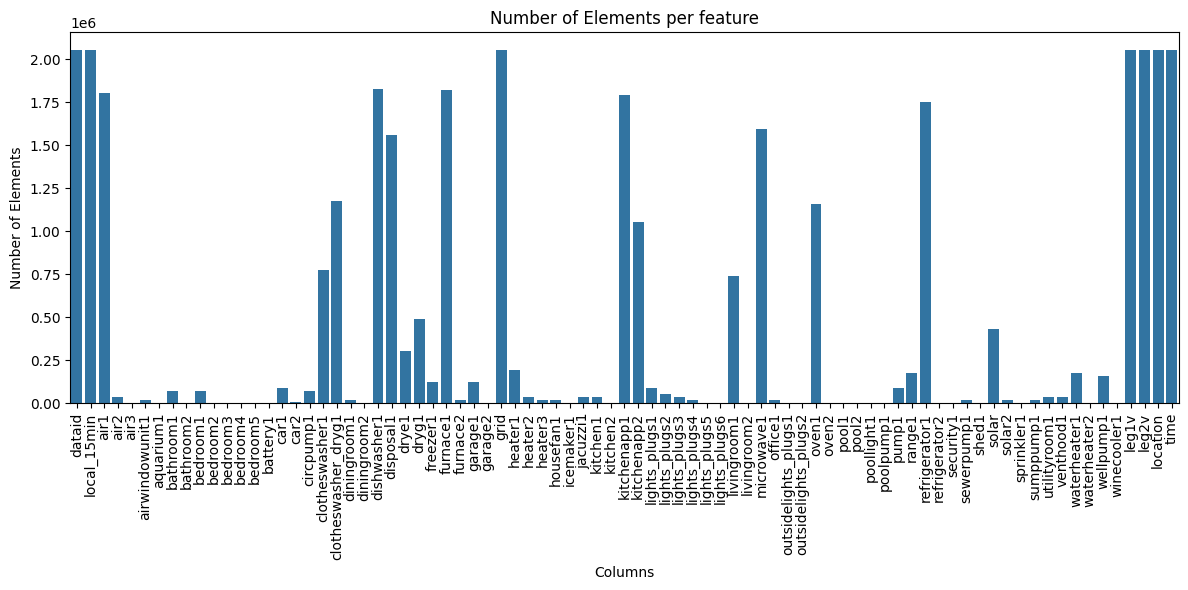

In [32]:
element_counts = combined_df.count()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=element_counts.index, y=element_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Number of Elements')
plt.title('Number of Elements per feature')
plt.tight_layout()
plt.show()


### Null values removal

In [33]:
nan_threshold = 0.5

nan_percentages = combined_df.isnull().mean()

columns_to_drop = nan_percentages[(nan_percentages == 1) | (nan_percentages > nan_threshold)].index.tolist()

if 'solar' in columns_to_drop:
    columns_to_drop.remove('solar')

# Drop the identified columns from the Dask DataFrame
df = combined_df.drop(columns=columns_to_drop)

print(f"Dropped columns: {columns_to_drop}")
df.head()

Dropped columns: ['air2', 'air3', 'airwindowunit1', 'aquarium1', 'bathroom1', 'bathroom2', 'bedroom1', 'bedroom2', 'bedroom3', 'bedroom4', 'bedroom5', 'battery1', 'car1', 'car2', 'circpump1', 'clotheswasher1', 'diningroom1', 'diningroom2', 'drye1', 'dryg1', 'freezer1', 'furnace2', 'garage1', 'garage2', 'heater1', 'heater2', 'heater3', 'housefan1', 'icemaker1', 'jacuzzi1', 'kitchen1', 'kitchen2', 'lights_plugs1', 'lights_plugs2', 'lights_plugs3', 'lights_plugs4', 'lights_plugs5', 'lights_plugs6', 'livingroom1', 'livingroom2', 'office1', 'outsidelights_plugs1', 'outsidelights_plugs2', 'oven2', 'pool1', 'pool2', 'poollight1', 'poolpump1', 'pump1', 'range1', 'refrigerator2', 'security1', 'sewerpump1', 'shed1', 'solar2', 'sprinkler1', 'sumppump1', 'utilityroom1', 'venthood1', 'waterheater1', 'waterheater2', 'wellpump1', 'winecooler1']


,dataid,local_15min,air1,clotheswasher_dryg1,dishwasher1,disposal1,furnace1,grid,kitchenapp1,kitchenapp2,microwave1,oven1,refrigerator1,solar,leg1v,leg2v,location,time
0,3687,2014-01-01 00:00:00-06,0.0,0.003,0.0,0.0,0.008,1.717,0.000,NaN,0.055,0.597,0.004,NaN,120.239,119.769,california,2014-01-01 00:00:00
1,3687,2014-01-01 00:15:00-06,0.0,0.003,0.0,0.0,0.008,1.905,0.001,NaN,0.235,0.563,0.028,NaN,120.256,119.628,california,2014-01-01 00:00:00
2,3687,2014-01-01 00:30:00-06,0.0,0.003,0.0,0.0,0.008,1.923,0.000,NaN,0.005,0.552,0.116,NaN,120.358,119.859,california,2014-01-01 00:00:00
3,3687,2014-01-01 00:45:00-06,0.0,0.003,0.0,0.0,0.008,1.535,0.003,NaN,0.005,0.277,0.084,NaN,120.766,119.985,california,2014-01-01 00:00:00
4,3687,2014-01-01 01:00:00-06,0.0,0.003,0.0,0.0,0.008,1.010,0.001,NaN,0.005,0.000,0.000,NaN,120.844,120.368,california,2014-01-01 01:00:00


In [34]:
df

,dataid,local_15min,air1,clotheswasher_dryg1,dishwasher1,disposal1,furnace1,grid,kitchenapp1,kitchenapp2,microwave1,oven1,refrigerator1,solar,leg1v,leg2v,location,time
0,3687,2014-01-01 00:00:00-06,0.0,0.003,0.0,0.0,0.008,1.717,0.000,NaN,0.055,0.597,0.004,NaN,120.239,119.769,california,2014-01-01 00:00:00
1,3687,2014-01-01 00:15:00-06,0.0,0.003,0.0,0.0,0.008,1.905,0.001,NaN,0.235,0.563,0.028,NaN,120.256,119.628,california,2014-01-01 00:00:00
2,3687,2014-01-01 00:30:00-06,0.0,0.003,0.0,0.0,0.008,1.923,0.000,NaN,0.005,0.552,0.116,NaN,120.358,119.859,california,2014-01-01 00:00:00
3,3687,2014-01-01 00:45:00-06,0.0,0.003,0.0,0.0,0.008,1.535,0.003,NaN,0.005,0.277,0.084,NaN,120.766,119.985,california,2014-01-01 00:00:00
4,3687,2014-01-01 01:00:00-06,0.0,0.003,0.0,0.0,0.008,1.010,0.001,NaN,0.005,0.000,0.000,NaN,120.844,120.368,california,2014-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2052642,3996,2019-10-31 22:00:00-05,NaN,NaN,0.0,NaN,0.006,1.428,NaN,NaN,NaN,NaN,0.087,NaN,120.205,120.188,new york,2019-10-31 22:00:00
2052643,914,2019-10-31 23:45:00-05,NaN,NaN,NaN,NaN,NaN,0.360,NaN,NaN,NaN,0.003,NaN,-0.003,123.271,123.032,new york,2019-10-31 23:00:00
2052644,914,2019-10-31 23:30:00-05,NaN,NaN,NaN,NaN,NaN,0.548,NaN,NaN,NaN,0.003,NaN,-0.003,123.405,122.970,new york,2019-10-31 23:00:00
2052645,914,2019-10-31 23:15:00-05,NaN,NaN,NaN,NaN,NaN,0.539,NaN,NaN,NaN,0.003,NaN,-0.003,123.532,123.104,new york,2019-10-31 23:00:00


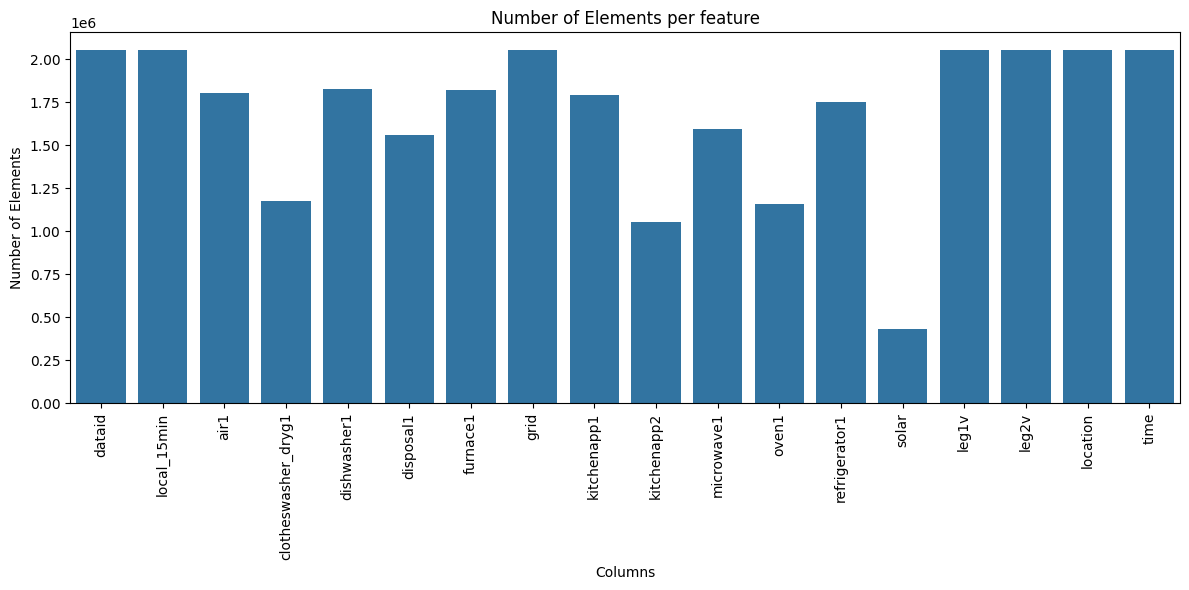

In [35]:
element_counts = df.count()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=element_counts.index, y=element_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Number of Elements')
plt.title('Number of Elements per feature')
plt.tight_layout()
plt.show()


In [36]:
df.columns

Index(['dataid', 'local_15min', 'air1', 'clotheswasher_dryg1', 'dishwasher1',
       'disposal1', 'furnace1', 'grid', 'kitchenapp1', 'kitchenapp2',
       'microwave1', 'oven1', 'refrigerator1', 'solar', 'leg1v', 'leg2v',
       'location', 'time'],
      dtype='object')

### Data dictionary

| Field                    | Description                                            | Data Type | Units     | Notes                                                     |
| ------------------------ | ------------------------------------------------------ | --------- | --------- | --------------------------------------------------------- |
| **dataid**               | Unique record identifier                               | Integer   | —         | Auto-incremented or UUID                                  |
| **time**                 | Timestamp of measurement                               | Datetime  | ISO 8601  | e.g. `2025-06-26T21:00:00-04:00`                          |
| **air1**                 | Power draw of the air-conditioning circuit             | Float     | Kilo-Watts (kW) | Measured via CT clamp on “Air compressor” channel         |
| **clotheswasher\_dryg1** | Combined washer/dryer load                             | Float     | Kilo-Watts (kW) | May include both washer and dryer if on same CT loop      |
| **dishwasher1**          | Power draw of the dishwasher                           | Float     | Kilo-Watts (kW) |                                                           |
| **disposal1**            | Power draw of the garbage disposal                     | Float     | Kilo-Watts (kW) |                                                           |
| **furnace1**             | Power draw of the furnace                              | Float     | Kilo-Watts (kW) |                                                           |
| **grid**                 | Net grid import (+) or export (–)                      | Float     | Kilo-Watts (kW) | Positive → importing from grid; negative → exporting back |
| **kitchenapp1**          | Power draw of kitchen appliance group 1 (e.g. outlets) | Float     | Kilo-Watts (kW) | Label channels according to your panel mapping            |
| **kitchenapp2**          | Power draw of kitchen appliance group 2 (e.g. outlets) | Float     | Kilo-Watts (kW) |                                                           |
| **microwave1**           | Power draw of the microwave                            | Float     | Kilo-Watts (kW) |                                                           |
| **oven1**                | Power draw of the electric oven                        | Float     | Kilo-Watts (kW) |                                                           |
| **refrigerator1**        | Power draw of the refrigerator                         | Float     | Kilo-Watts (kW) |                                                           |
| **leg1v**                | Voltage on split-phase leg 1                           | Float     | Volts (V) |                                                           |
| **leg2v**                | Voltage on split-phase leg 2                           | Float     | Volts (V) |                                                           |

In terms of leg voltages:
That setup is a split-phase (often called “residential single-phase with two hot legs”) system, not a true three-phase service.

You’ve got two hot conductors (Leg 1 and Leg 2), each ~120 V relative to neutral, but 180° out of phase with each other.

Between Leg 1 and Leg 2 you’ll measure ~240 V, which is how you power heavy loads (like your oven or dryer).

A three-phase service would have three hot legs, each 120° apart, giving you three distinct phase-to-phase voltages (and typically higher total capacity).

### Reduce dataset size with datatypes

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052647 entries, 0 to 2052646
Data columns (total 18 columns):
 #   Column               Dtype         
---  ------               -----         
 0   dataid               int64         
 1   local_15min          object        
 2   air1                 float64       
 3   clotheswasher_dryg1  float64       
 4   dishwasher1          float64       
 5   disposal1            float64       
 6   furnace1             float64       
 7   grid                 float64       
 8   kitchenapp1          float64       
 9   kitchenapp2          float64       
 10  microwave1           float64       
 11  oven1                float64       
 12  refrigerator1        float64       
 13  solar                float64       
 14  leg1v                float64       
 15  leg2v                float64       
 16  location             object        
 17  time                 datetime64[ns]
dtypes: datetime64[ns](1), float64(14), int64(1), object(2)
memory 

In [38]:
df['dataid'] = df['dataid'].astype('int16')
df['air1'] = df['air1'].astype('float32')
df['clotheswasher_dryg1'] = df['clotheswasher_dryg1'].astype('float32')
df['dishwasher1'] = df['dishwasher1'].astype('float32')
df['disposal1'] = df['disposal1'].astype('float32')
df['furnace1'] = df['furnace1'].astype('float32')
df['grid'] = df['grid'].astype('float32')
df['kitchenapp1'] = df['kitchenapp1'].astype('float32')
df['kitchenapp2'] = df['kitchenapp2'].astype('float32')
df['microwave1'] = df['microwave1'].astype('float32')
df['oven1'] = df['oven1'].astype('float32')
df['refrigerator1'] = df['refrigerator1'].astype('float32')
df['solar'] = df['solar'].astype('float32')
df['leg1v'] = df['leg1v'].astype('float32')
df['leg2v'] = df['leg2v'].astype('float32')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052647 entries, 0 to 2052646
Data columns (total 18 columns):
 #   Column               Dtype         
---  ------               -----         
 0   dataid               int16         
 1   local_15min          object        
 2   air1                 float32       
 3   clotheswasher_dryg1  float32       
 4   dishwasher1          float32       
 5   disposal1            float32       
 6   furnace1             float32       
 7   grid                 float32       
 8   kitchenapp1          float32       
 9   kitchenapp2          float32       
 10  microwave1           float32       
 11  oven1                float32       
 12  refrigerator1        float32       
 13  solar                float32       
 14  leg1v                float32       
 15  leg2v                float32       
 16  location             object        
 17  time                 datetime64[ns]
dtypes: datetime64[ns](1), float32(14), int16(1), object(2)
memory 

In [40]:
num_data_id = df['dataid'].value_counts()
num_data_id.head()

,count
dataid,
5938,70264
3938,70264
9775,70264
8061,70264
4934,70264


# Weather merging

In [50]:
import openmeteo_requests
import requests_cache
from retry_requests import retry

In [42]:
df['location'].unique()

array(['california', 'texas', 'new york'], dtype=object)

In [43]:
city_coords = {
    'california': {'lat': 37.7749, 'lon': -122.4194},   # San Francisco
    'texas': {'lat': 30.2672, 'lon': -97.7431},         # Austin
    'new york': {'lat': 40.7128, 'lon': -74.0060}       # New York City
}

In [44]:
df['latitude'] = df['location'].map(lambda x: city_coords[x]['lat'])
df['longitude'] = df['location'].map(lambda x: city_coords[x]['lon'])

In [57]:
df['hour'] = df['time'].dt.floor('h').dt.tz_localize('UTC') # truncate to the hour and localize to UTC

In [58]:
hourly_vars = [
    "temperature_2m", "relative_humidity_2m", "dew_point_2m", "apparent_temperature",
    "precipitation", "rain", "snowfall", "snow_depth", "weather_code",
    "pressure_msl", "surface_pressure", "cloud_cover", "cloud_cover_low",
    "cloud_cover_mid", "cloud_cover_high", "et0_fao_evapotranspiration",
    "vapour_pressure_deficit", "wind_speed_10m", "wind_speed_100m",
    "wind_direction_10m", "wind_direction_100m", "wind_gusts_10m",
    "soil_temperature_0_to_7cm", "soil_temperature_7_to_28cm",
    "soil_temperature_28_to_100cm", "soil_temperature_100_to_255cm",
    "soil_moisture_0_to_7cm", "soil_moisture_7_to_28cm",
    "soil_moisture_28_to_100cm", "soil_moisture_100_to_255cm"
]

In [59]:
# Setup Open-Meteo session
cache_session = requests_cache.CachedSession('.cache', expire_after=-1)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

In [60]:
weather_dfs = []

In [61]:
for loc, coords in city_coords.items():
    # Filter your main DataFrame for this location to find min/max datetime
    mask = df['location'] == loc
    if not mask.any():
        continue  # skip locations not present

    min_date = df.loc[mask, 'time'].min().date().isoformat()
    max_date = df.loc[mask, 'time'].max().date().isoformat()

    params = {
        "latitude": coords['lat'],
        "longitude": coords['lon'],
        "start_date": min_date,
        "end_date": max_date,
        "hourly": hourly_vars
    }
    url = "https://archive-api.open-meteo.com/v1/archive"
    responses = openmeteo.weather_api(url, params=params)
    response = responses[0]
    hourly = response.Hourly()
    # Build the time index
    time_index = pd.date_range(
        start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
        end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
        freq=pd.Timedelta(seconds=hourly.Interval()),
        inclusive="left"
    )
    hourly_data = {"hour": time_index}
    for i, var in enumerate(hourly_vars):
        hourly_data[var] = hourly.Variables(i).ValuesAsNumpy()
    df_city = pd.DataFrame(hourly_data)
    df_city["location"] = loc
    weather_dfs.append(df_city)

weather_all = pd.concat(weather_dfs, ignore_index=True)

In [62]:
weather_all.head()

,hour,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,rain,snowfall,snow_depth,weather_code,...,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm,location
0,2014-01-01 00:00:00+00:00,14.474,44.350849,2.474,11.680662,0.0,0.0,0.0,0.0,0.0,...,18.719999,16.574001,10.824,11.574,16.274,0.101,0.203,0.251,0.326,california
1,2014-01-01 01:00:00+00:00,13.174,51.250698,3.324,10.524400,0.0,0.0,0.0,0.0,0.0,...,16.919998,14.374000,10.974,11.574,16.274,0.101,0.202,0.251,0.326,california
2,2014-01-01 02:00:00+00:00,11.574,62.586376,4.674,9.126616,0.0,0.0,0.0,0.0,0.0,...,15.840000,12.274000,11.074,11.574,16.274,0.101,0.202,0.251,0.326,california
3,2014-01-01 03:00:00+00:00,10.274,73.396492,5.724,7.916602,0.0,0.0,0.0,0.0,0.0,...,17.280001,10.674000,11.074,11.574,16.274,0.101,0.202,0.251,0.326,california
4,2014-01-01 04:00:00+00:00,9.074,82.628227,6.274,6.866892,0.0,0.0,0.0,0.0,0.0,...,18.000000,9.424000,10.974,11.574,16.274,0.101,0.202,0.251,0.326,california


In [63]:
df = pd.merge(df, weather_all, on=['hour', 'location'], how='left')

In [64]:
df.head()

,dataid,local_15min,air1,clotheswasher_dryg1,dishwasher1,disposal1,furnace1,grid,kitchenapp1,kitchenapp2,...,wind_direction_100m,wind_gusts_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_temperature_28_to_100cm,soil_temperature_100_to_255cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,soil_moisture_28_to_100cm,soil_moisture_100_to_255cm
0,3687,2014-01-01 00:00:00-06,0.0,0.003,0.0,0.0,0.008,1.717,0.000,NaN,...,307.875031,18.719999,16.574001,10.824,11.574,16.274,0.101,0.203,0.251,0.326
1,3687,2014-01-01 00:15:00-06,0.0,0.003,0.0,0.0,0.008,1.905,0.001,NaN,...,307.875031,18.719999,16.574001,10.824,11.574,16.274,0.101,0.203,0.251,0.326
2,3687,2014-01-01 00:30:00-06,0.0,0.003,0.0,0.0,0.008,1.923,0.000,NaN,...,307.875031,18.719999,16.574001,10.824,11.574,16.274,0.101,0.203,0.251,0.326
3,3687,2014-01-01 00:45:00-06,0.0,0.003,0.0,0.0,0.008,1.535,0.003,NaN,...,307.875031,18.719999,16.574001,10.824,11.574,16.274,0.101,0.203,0.251,0.326
4,3687,2014-01-01 01:00:00-06,0.0,0.003,0.0,0.0,0.008,1.010,0.001,NaN,...,306.384460,16.919998,14.374000,10.974,11.574,16.274,0.101,0.202,0.251,0.326


# Save dataset

In [65]:
file_path = root_path + "/pecan_weather_merged_dataset.csv"
df.to_csv(file_path, index=False)
print(f"DataFrame saved to: {file_path}")

DataFrame saved to: /content/drive/MyDrive/Workspace/PROGRAMS/2025 AI4All/project/data/pecan_weather_merged_dataset.csv
